###### 【問題1】学習・推定
以下のKeras実装を使用して学習・推定を行ってください

学習はGoogle colaboratorで行った。以下、学習で得たパラメータをローカルで読み込み予測を行なった。

In [33]:
import numpy as np 
import glob
import os
import glob
import skimage.io as io
import skimage.transform as trans
import sys
import time

In [7]:
sys.path.append("/Users/naoki/Desktop/DIC/Github_clone/unet")

from data import *
from model import *

Using TensorFlow backend.


In [9]:
unet_model = unet()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/Users/naoki/Desktop/DIC/Github_clone/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [44]:
unet_model.load_weights('unet_tgs_salt.hdf5')

In [66]:
def run_prediction(model, path, image_folder, mask_folder, num_of_file=10, target_size=(256,256), flag_multi_class = True, as_gray = True):
    image_file_path = "{}/{}".format(path, image_folder) 
    print("",image_file_path)
    
    files = glob.glob(image_file_path + "/*.png")
    for i, file in enumerate(files):
        if num_of_file <= i:
          break
      
        print("No:{} Filename:{}".format(i, file))
        print("Original image")
        img = io.imread(file, as_gray=as_gray)
        print(img.shape)
        io.imshow(img)
        io.show()

        mask_file = "{}".format(file)
        mask_file = mask_file.replace(image_folder, mask_folder)
        print("No:{} Mask_filename:{}".format(i, mask_file))
        print("Mask image")
        img_mask = io.imread(mask_file, as_gray=as_gray)        
        #print(img_mask)
        io.imshow(img_mask)
        io.show()

        img = img / 255
        img = trans.resize(img,target_size)
        img = img[:,:,0].reshape(256,256,1)    
        img = np.reshape(img,img.shape+(1,)) if (not flag_multi_class) else img
        img = np.reshape(img,(1,)+img.shape)

        print("Prediction result")
        img = model.predict(img)
        #img = results[0].reshape(256,256,1)  
        #img = labelVisualize(2,COLOR_DICT,results)

        output = np.zeros((101,101,3))
        img = img[0]
        print(img.shape)
        img = trans.resize(img, (101,101))
        output[:,:,0] = img[:,:,0]
        output[:,:,1] = img[:,:,0]
        output[:,:,2] = img[:,:,0]

        io.imshow(output)
        io.show()
        
        #time.sleep(1
        print("\n")

trainデータを使って予測を行い、教師データと予測結果の比較を行う。  
元データ、教師データ、予測結果の順で以下に画像を表示する

 ./data/train/images
No:0 Filename:./data/train/images/44381a3f55.png
Original image
(101, 101, 3)


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


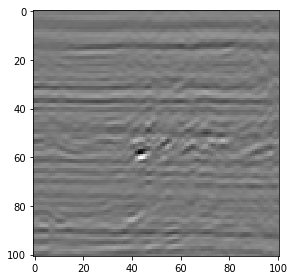

No:0 Mask_filename:./data/train/masks/44381a3f55.png
Mask image


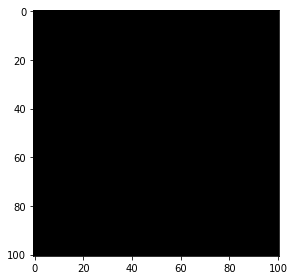

Prediction result
(256, 256, 1)


/Users/naoki/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


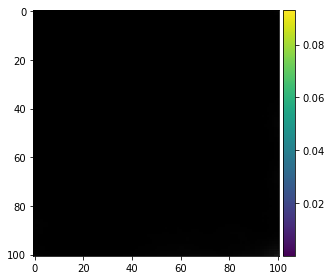



No:1 Filename:./data/train/images/70db04a203.png
Original image
(101, 101, 3)


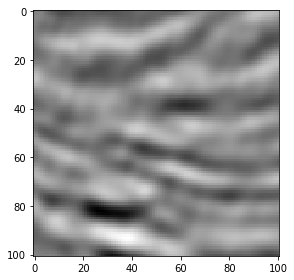

No:1 Mask_filename:./data/train/masks/70db04a203.png
Mask image


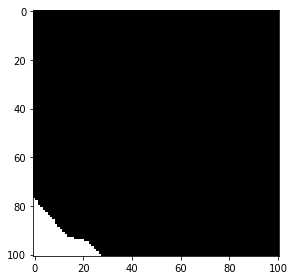

Prediction result
(256, 256, 1)


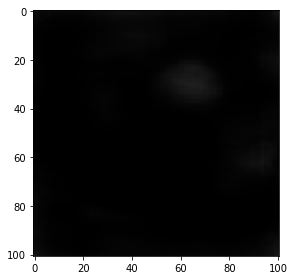



No:2 Filename:./data/train/images/42c563d895.png
Original image
(101, 101, 3)


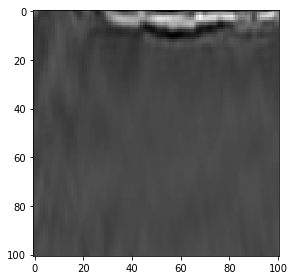

No:2 Mask_filename:./data/train/masks/42c563d895.png
Mask image


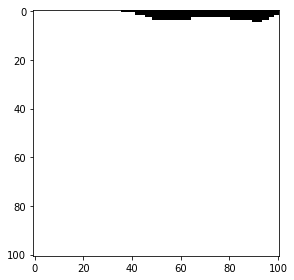

Prediction result
(256, 256, 1)


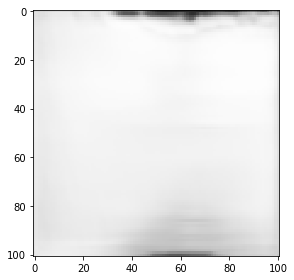



No:3 Filename:./data/train/images/d422a9eb8f.png
Original image
(101, 101, 3)


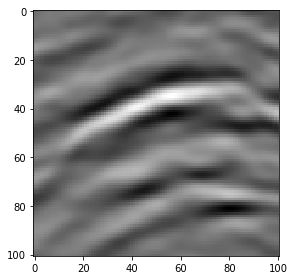

No:3 Mask_filename:./data/train/masks/d422a9eb8f.png
Mask image


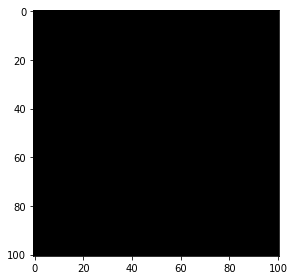

Prediction result
(256, 256, 1)


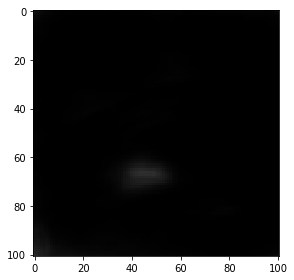



No:4 Filename:./data/train/images/6d4fca6a35.png
Original image
(101, 101, 3)


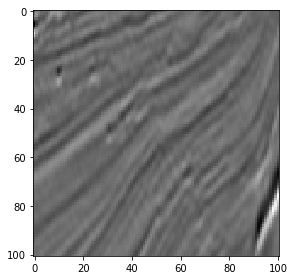

No:4 Mask_filename:./data/train/masks/6d4fca6a35.png
Mask image


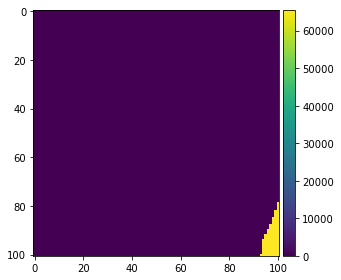

Prediction result
(256, 256, 1)


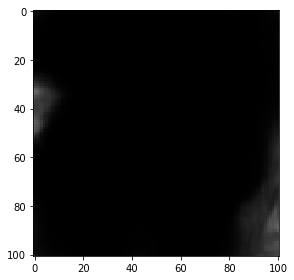



No:5 Filename:./data/train/images/7ebd3f0cdd.png
Original image
(101, 101, 3)


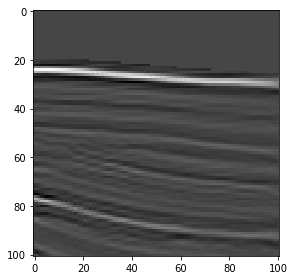

No:5 Mask_filename:./data/train/masks/7ebd3f0cdd.png
Mask image


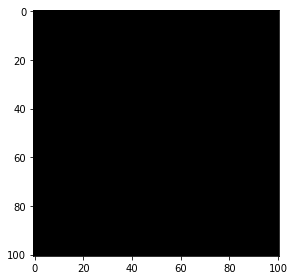

Prediction result
(256, 256, 1)


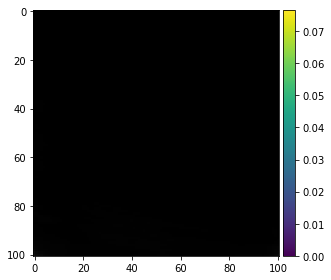



No:6 Filename:./data/train/images/99d7f0c538.png
Original image
(101, 101, 3)


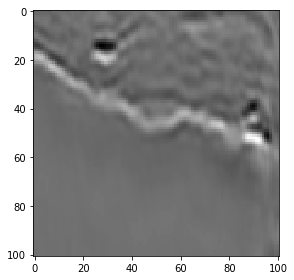

No:6 Mask_filename:./data/train/masks/99d7f0c538.png
Mask image


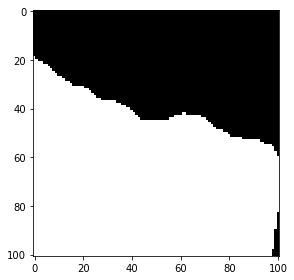

Prediction result
(256, 256, 1)


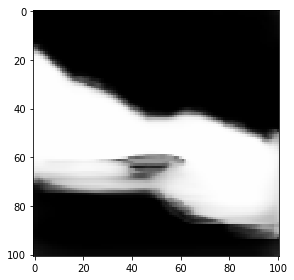



No:7 Filename:./data/train/images/f43f1e7456.png
Original image
(101, 101, 3)


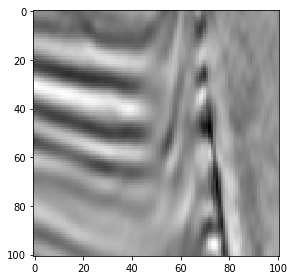

No:7 Mask_filename:./data/train/masks/f43f1e7456.png
Mask image


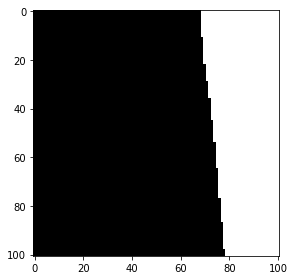

Prediction result
(256, 256, 1)


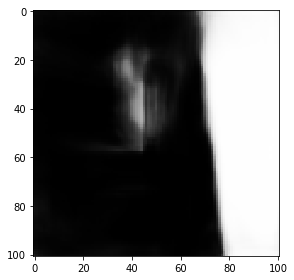



No:8 Filename:./data/train/images/c756ff4e1f.png
Original image
(101, 101, 3)


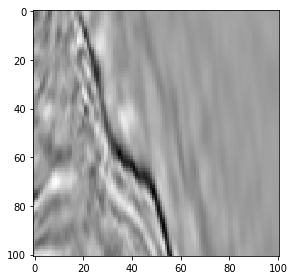

No:8 Mask_filename:./data/train/masks/c756ff4e1f.png
Mask image


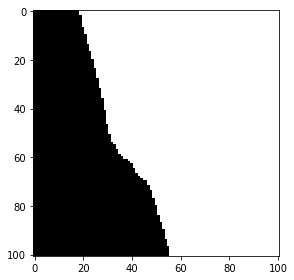

Prediction result
(256, 256, 1)


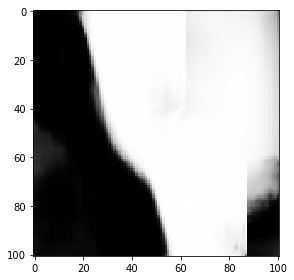



No:9 Filename:./data/train/images/ff238df1c4.png
Original image
(101, 101, 3)


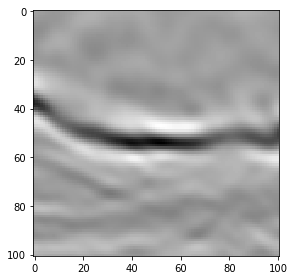

No:9 Mask_filename:./data/train/masks/ff238df1c4.png
Mask image


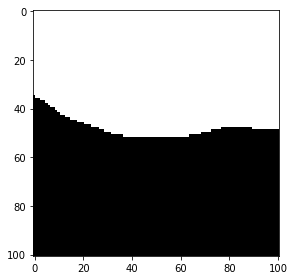

Prediction result
(256, 256, 1)


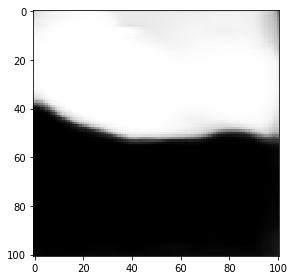

In [67]:
run_prediction(unet_model, "./data/train", "images", "masks", num_of_file=10)

予測の結果、大まかに教師データと同じ様にクラス分けされている。

###### 【問題2】コードリーディング
論文[1]に目を通した上で、上記実装のコードリーディングを行ってください。

1.NNレイヤー

In [ ]:
def unet(pretrained_weights = None,input_size = (256,256,1)):
    inputs = Input(input_size)
    #Contracting path
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    #Expansive path
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(input = inputs, output = conv10)

1.Contracting path  
・基本Conv, Conv, MaxPoolingを繰り返す、最後の２回はConvの後にDropoutが追加されている（実用上、過学習を抑えるため)  
・Convのフィルタサイズは3x3、出力数は入力の２倍、入力画像のサイズを保存する様に出力は０パディングされる  
・MaxPoolingは2x2で固定  

2.Expansive path  
・Upsamplingでサイズを広げ、Convで出力数を入力数の半分にする。  
・ConcatenateでContructing pathの対応する部分の出力結果を追加し、Convでマージする。  

2.Loss関数

In [ ]:
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

論文ではクラス間の境界線を強調するために、Lossに対してそのセルからクラスの境界までの距離に依存する重み付けをしているが、Gitの実装ではBinary_crossentropy（2クラス分類のため）が使われている。

境界の重み付け  
w(x) = wc(x) + w0 · exp( (d1(x) + d2(x))2 / 2σ )  
*d1 = xから最近坊クラスの境界までの距離  
*d2 = xから2番目に近いクラスの境界までの距離  
*w0 = ハイパーパラメータ (= 10が良いらしい)  